In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = ['user_id', 'item_id', 'rating','timestamp']
df = pd.read_csv('../datasets/ml-100k/u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
d = {
    "userId" : df['user_id'].nunique() , 
    "itemId" : df['item_id'].nunique() , 
    "rating" : df['rating'].nunique() ,
}
d

{'userId': 943, 'itemId': 1682, 'rating': 5}

In [8]:
# Retrievin the movie titles
movies_title = pd.read_csv('../datasets/ml-100k/u.item', sep='\|', engine="python",header=None , encoding='latin-1')
movies_title = movies_title[[0,1]]

In [9]:
movies_title.columns = ['item_id', 'title']
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df = pd.merge(df, movies_title, on='item_id')
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [11]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [12]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [13]:
ratings_df = pd.DataFrame(df.groupby('title').mean()['rating'])

In [14]:
ratings_df['number of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings_df

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [15]:
ratings_df.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


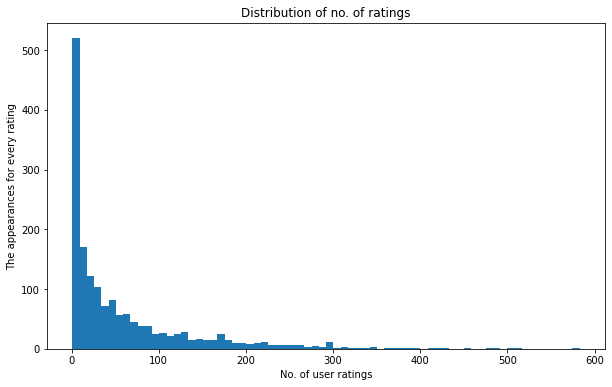

In [16]:
plt.figure(figsize=(10,6))
plt.hist(ratings_df['number of ratings'], bins=70)
plt.xlabel('No. of user ratings')
plt.ylabel('The appearances for every rating')
plt.title('Distribution of no. of ratings')
plt.show()

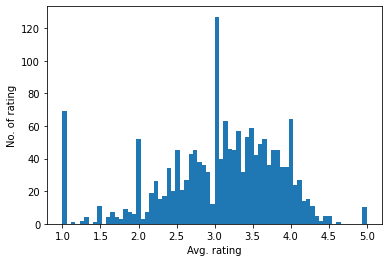

In [17]:
plt.hist(ratings_df['rating'],bins=70)
plt.xlabel('Avg. rating')
plt.ylabel('No. of rating')
plt.show()

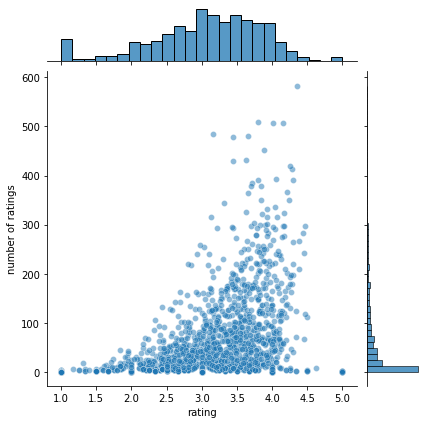

In [18]:
sns.jointplot(x = ratings_df['rating'], y = ratings_df['number of ratings'], data = ratings_df, alpha = 0.5)

In [20]:
# Calculating PopularityRank as the rank of count for movies in the data
user_ids = []
movie_ids = []
ratings = []
timestamps = []

# Open the file as text, split each line and collect the data into a PD.DATAFRAME 
with open("../datasets/ml-100k/u.data", 'rt') as file1:
    for line in file1.readlines():
        a = line.split()
        user_ids.append(a[0])
        movie_ids.append(a[1])
        ratings.append(a[2])
        timestamps.append(a[3])

rating_df = pd.DataFrame({'user_id': user_ids, 'movie_id': movie_ids, 'rating': ratings, 'timestamp': timestamps})
rating_df.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
movie_ids = []
movie_titles = []
release_dates = []

# Open the file as text, split each line and collect the data into a PD.DATAFRAME 
with open("../datasets/ml-100k/u.item", 'rt', encoding='latin-1') as file2:
    for line in file2.readlines():
        a = line.split("|")
        movie_ids.append(a[0])
        movie_titles.append(a[1])
        release_dates.append(a[2])

item_df = pd.DataFrame({'movie_id': movie_ids, 'movie_title': movie_titles, 'release_date': release_dates})
item_df.head()

,movie_id,movie_title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


Text(0, 0.5, '# Times Rated')

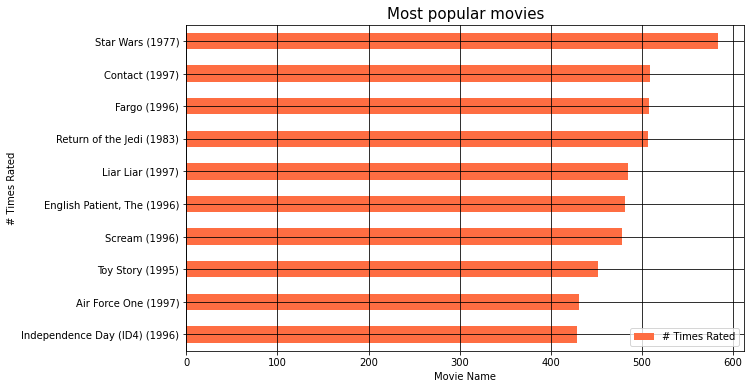

In [24]:
pop_df = rating_df.groupby('movie_id').count()['rating'].reset_index(name='count').sort_values('count', ascending=False)
pop_df['PopularityRank'] = list(range(1, pop_df.shape[0]+1))

# Merging the data to fetch movie titles
pop_df_w_item_name = pd.merge(pop_df, item_df, on='movie_id', how='inner')

# Plotting top 10 movies
pop_df_w_item_name[pop_df_w_item_name['PopularityRank'] <= 10].sort_values('count').\
                    plot.barh(x='movie_title', y='count', label='# Times Rated', figsize=(10,6), color='#FE6D42')
plt.grid(visible=True, color='black')
plt.title("Most popular movies", fontsize=15)
plt.xlabel("Movie Name", fontsize=10)
plt.ylabel("# Times Rated", fontsize=10)

(0.0, 6.0)

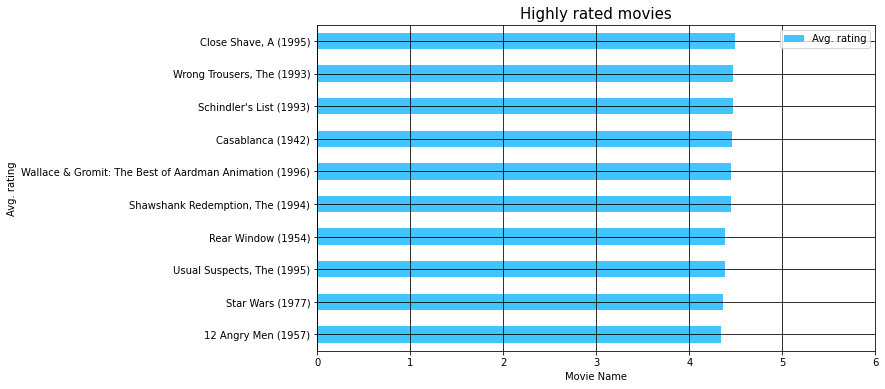

In [25]:
rating_df['rating'] = rating_df['rating'].astype(float)
rating_df_agg = rating_df.groupby('movie_id').agg(avg_rating=('rating', 'mean'), count=('rating', 'count')).reset_index()
rating_df_agg['avg_rating'] = np.round(rating_df_agg['avg_rating'], 2)
rating_df_agg_10 = rating_df_agg[rating_df_agg['count']>10]

rating_df_agg_10_merged = pd.merge(rating_df_agg_10, item_df, on='movie_id', how='inner')

rating_df_agg_10_merged.sort_values('avg_rating').tail(10).\
                    plot.barh(x='movie_title', y='avg_rating', label='Avg. rating', figsize=(10,6), color='#42C5FE')
plt.grid(visible=True, color='black')
plt.title("Highly rated movies", fontsize=15)
plt.xlabel("Movie Name", fontsize=10)
plt.ylabel("Avg. rating", fontsize=10)
plt.xlim([0, 6])